# Exploratory Data Analysis :
    1-understanding data 
    2-preprocesseing data 
    3-cross viladion
    4-confusion matrix
 

In [24]:
import pandas as pd 
from matplotlib import pyplot as plt    #to creat boxplot
import seaborn as sns                      #to creat boxplot
import warnings
warnings.filterwarnings('ignore')
d=pd.read_csv("survey lung cancer2.csv")
df=pd.DataFrame(d)
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,1


# 1)understanding data

In [25]:
df.describe()         #returns descriptive statistics about the data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,306.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.611111,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.870550
std,8.203702,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.336242
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [26]:
df.info()        #give information about the dataset (returns a quick summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    306 non-null    float64
 1   SMOKING                309 non-null    int64  
 2   YELLOW_FINGERS         309 non-null    int64  
 3   ANXIETY                309 non-null    int64  
 4   PEER_PRESSURE          309 non-null    int64  
 5   CHRONIC DISEASE        309 non-null    int64  
 6   FATIGUE                309 non-null    int64  
 7   ALLERGY                309 non-null    int64  
 8   WHEEZING               309 non-null    int64  
 9   ALCOHOL CONSUMING      309 non-null    int64  
 10  COUGHING               309 non-null    int64  
 11  SHORTNESS OF BREATH    309 non-null    int64  
 12  SWALLOWING DIFFICULTY  309 non-null    int64  
 13  CHEST PAIN             309 non-null    int64  
 14  LUNG_CANCER            309 non-null    int64  
dtypes: flo

In [27]:
df.nunique()               #return number of unique values

AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

# 2.1)cleaning data --> handling mising values 

In [28]:
df.isna().sum()    #This returns the columns with the number of missing values

AGE                      3
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [29]:
#filling missing values
updated_df = df
updated_df['AGE']=updated_df['AGE'].fillna(updated_df['AGE'].mean())
updated_df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [30]:
df.isna().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# 2.2)cleaning data --> Detceting outliers

<Axes: ylabel='AGE'>

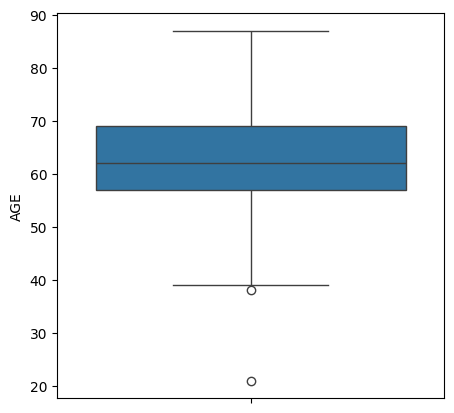

In [31]:
#boxplot help to detect the outliers 
plt.figure(figsize=(5,5))     
sns.boxplot(updated_df['AGE'])


In [32]:
#use IQR methode to handle outliers           
q1 = updated_df['AGE'].quantile(0.25)    #quantile>>function to find the value
q3 = updated_df['AGE'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit
df.loc[(updated_df['AGE'] > upper_limit) | (updated_df['AGE'] < lower_limit)]

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
22,21.0,2,1,1,1,2,2,2,1,1,1,2,1,1,0
238,38.0,1,2,1,1,2,2,2,2,1,2,2,1,2,1


In [33]:
#delete the outlier data
updated_df.loc[(updated_df['AGE']>=upper_limit), 'AGE'] = upper_limit
updated_df.loc[(updated_df['AGE']<=lower_limit), 'AGE'] = lower_limit
print("delet succed")

delet succed


<Axes: ylabel='AGE'>

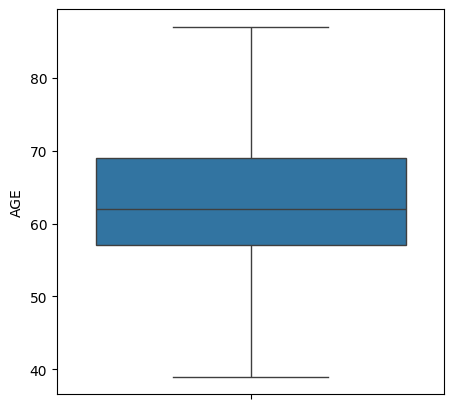

In [34]:
# to cheak the outliers is deleted
plt.figure(figsize=(5,5))
sns.boxplot(updated_df['AGE']) 

<Axes: >

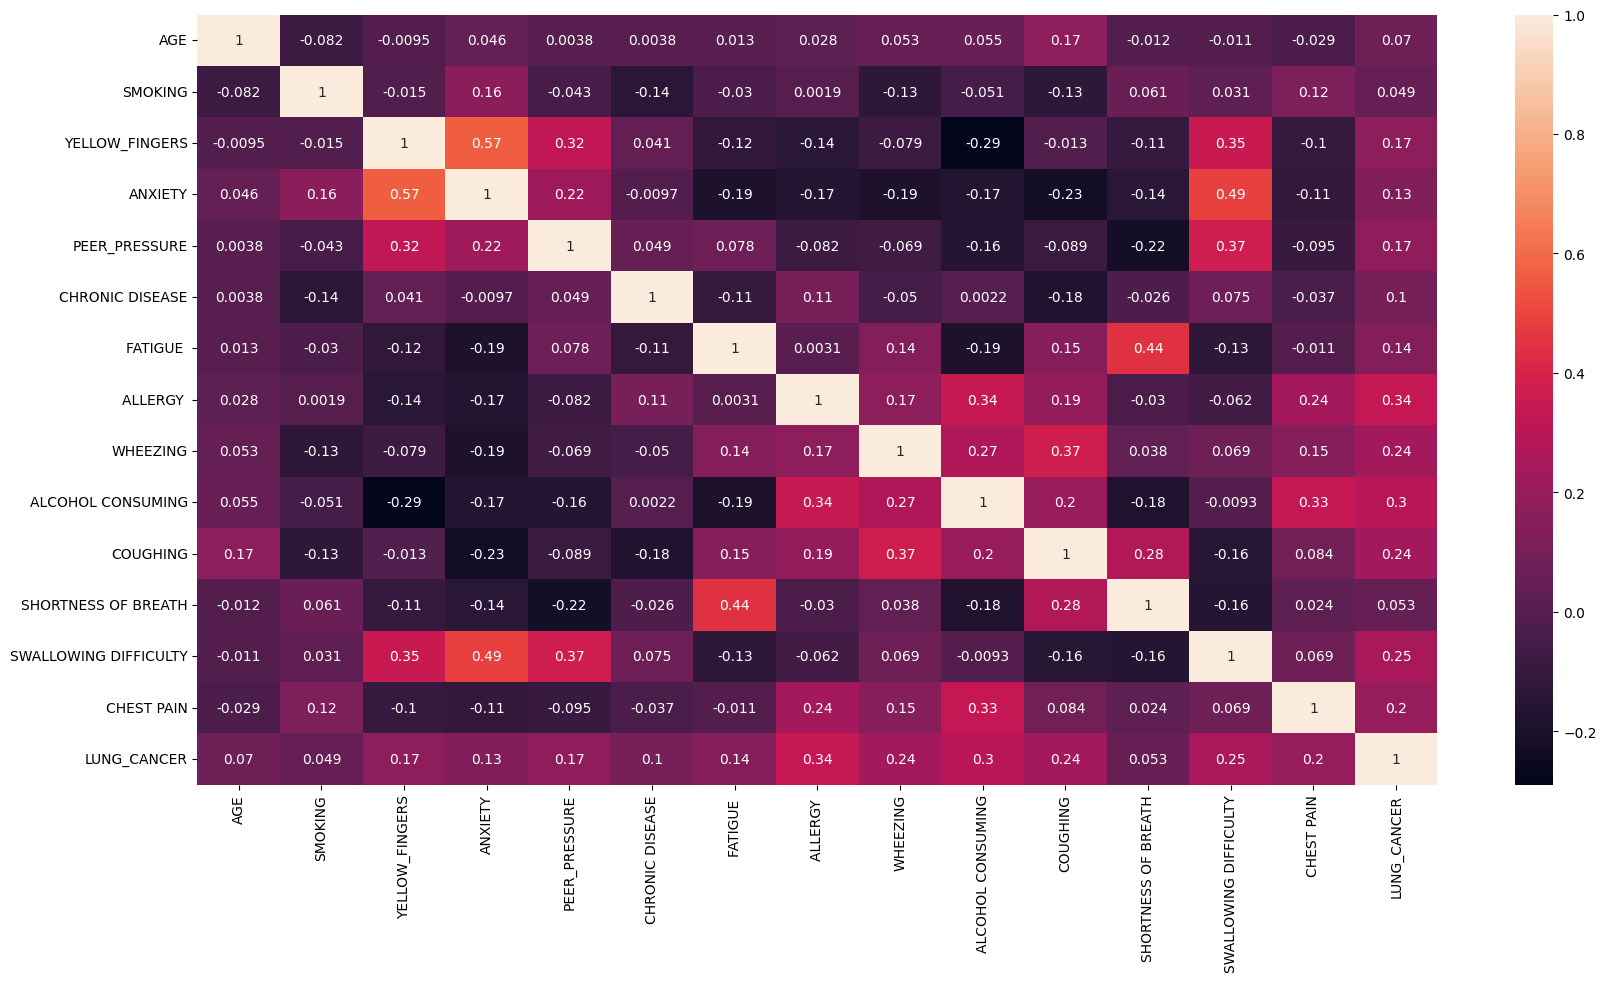

In [35]:
a=updated_df.corr()           #to return Pearson’s correlation coefficient between features.
plt.figure(figsize=(20,10))
sns.heatmap(a,annot=True)

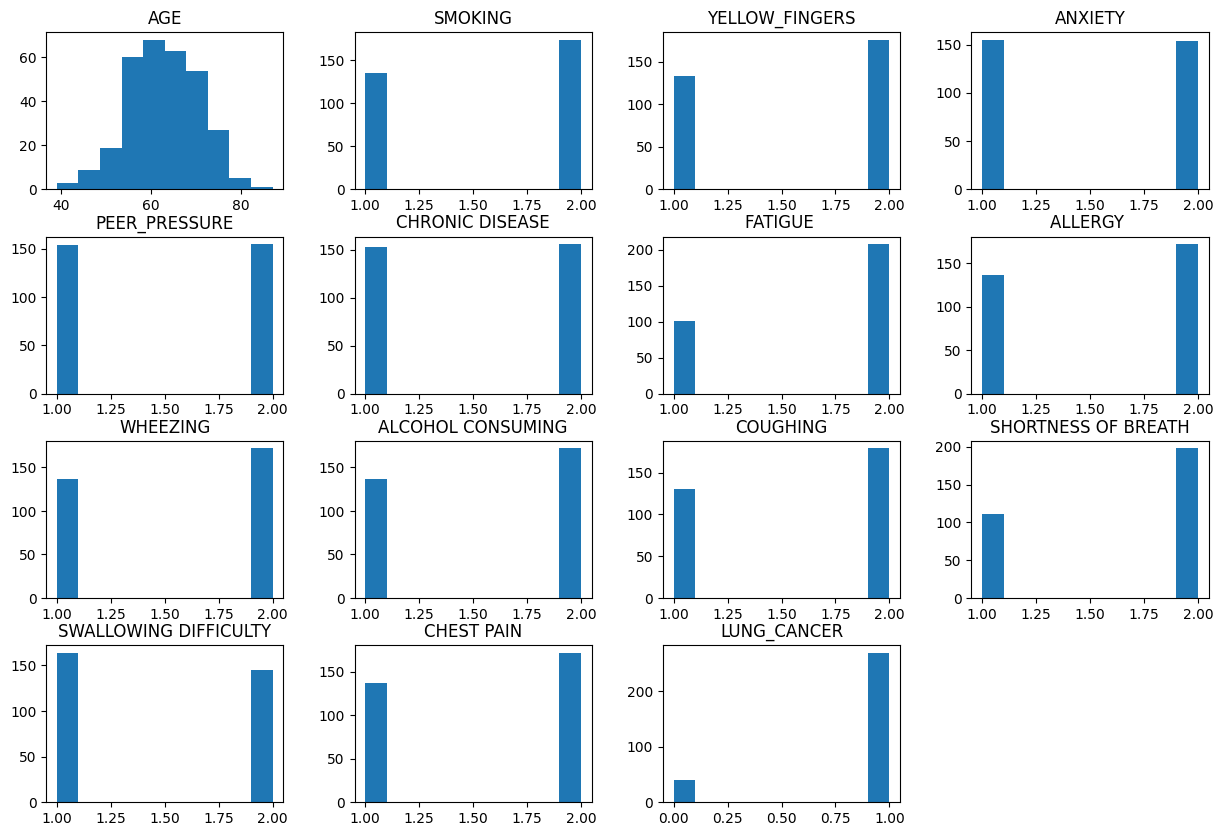

In [36]:
#hisotgram used to summarize data that is measured on an interval scale
hist_worst=updated_df.hist(bins=10, figsize=(15, 10),grid=False,) 

# 3_cross validation

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into input features (X) and output variable (y)
X = updated_df.drop('LUNG_CANCER', axis=1)
y = updated_df['LUNG_CANCER']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print("Shape of X_train:", X_train.shape) #print num of rows and cols in x_train
print("Shape of y_train:", y_train.shape) #print num of rows in y_train
print("Shape of X_test:", X_test.shape) #print num of rows and cols in X_test
print("Shape of y_test:", y_test.shape)#print num of rows in y_test

Shape of X_train: (216, 14)
Shape of y_train: (216,)
Shape of X_test: (93, 14)
Shape of y_test: (93,)


# use Alogrithms:

# random forest (RF) Algorithm : 

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# Initialize the classifiers
rf = RandomForestClassifier(random_state=0)
# Train the models on the training data
rf.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)  # 5-fold cross-validation
#بقسم داتا التدريب الي 5 اجزاء متساويه بدخل 4 يدربو وبقيسهم علي الخامس وهكذا 5 مرات ورا بعض 

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)       #بطبع الخمس نتايج اللي طلعتهم
print("Mean CV score:", cv_scores.mean())          #بطبع المتوسط بتاع الخمسه دا بيديني تقييم شامل لاداء النموذج    

Cross-validation scores: [0.81818182 0.86046512 0.90697674 0.95348837 0.90697674]
Mean CV score: 0.8892177589852007


# Check overfitting : 

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predict on the training set
y_train_pred = rf.predict(X_train)   #تنبئو علي مجموعه التدريب
# Predict on the test set
y_test_pred = rf.predict(X_test)     # تنبئو علي مجموعه الاختبار 

# Calculate performance metrics on training set
train_accuracy = accuracy_score(y_train, y_train_pred)  #بتقيس نسبة الصحيح بين جميع الموجود في مجموعه التدريب
train_precision = precision_score(y_train, y_train_pred)# تشير إلى نسبة التنبؤات الإيجابية الحقيقية بين جميع التنبؤات الإيجابية التي قدمها النموذج.
train_recall = recall_score(y_train, y_train_pred) #وهي تقيس نسبة الحالات الإيجابية الحقيقية التي تنبأ بها النموذج بشكل صحيح
train_f1 = f1_score(y_train, y_train_pred)

# Calculate performance metrics on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print performance metrics
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)




Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Test Set Metrics:
Accuracy: 0.946236559139785
Precision: 0.9523809523809523
Recall: 0.9876543209876543
F1-score: 0.9696969696969697


# 4_confusion_matrix :

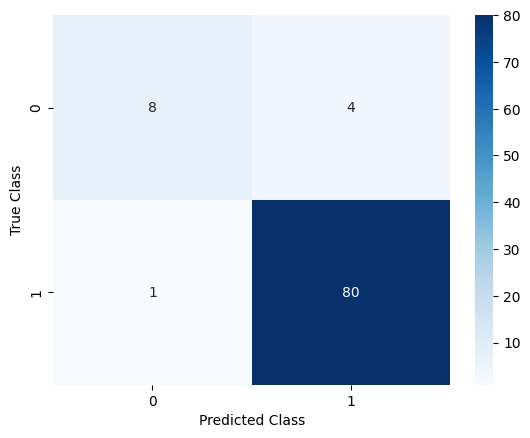

In [40]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

                    # Predicted Class
              #---------------------------       
              #  |    Positive   |  Negative   |
            #----------------------------------------------
 # Positive (P)   |  True Positive | False Negative |
 #  ----------------------------------------------
 # Negative (N)   |  False Positive| True Negative  |
 #   ----------------------------------------------


# naive_bayes algorithm :

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
# Initialize the classifiers
nb = GaussianNB()
# Train the models on the training data
nb.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(nb, X_train, y_train, cv=5)  # 5-fold cross-validation
#بقسم داتا التدريب الي 5 اجزاء متساويه بدخل 4 يدربو وبقيسهم علي الخامس وهكذا 5 مرات ورا بعض 

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)       #بطبع الخمس نتايج اللي طلعتهم
print("Mean CV score:", cv_scores.mean())  

Cross-validation scores: [0.90909091 0.69767442 0.86046512 1.         0.79069767]
Mean CV score: 0.8515856236786469


# Check overfitting : 

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predict on the training set
y_train_pred = nb.predict(X_train)   #تنبئو علي مجموعه التدريب
# Predict on the test set
y_test_pred = nb.predict(X_test)     # تنبئو علي مجموعه الاختبار 

# Calculate performance metrics on training set
train_accuracy = accuracy_score(y_train, y_train_pred)  #بتقيس نسبة الصحيح بين جميع الموجود في مجموعه التدريب
train_precision = precision_score(y_train, y_train_pred)# تشير إلى نسبة التنبؤات الإيجابية الحقيقية بين جميع التنبؤات الإيجابية التي قدمها النموذج.
train_recall = recall_score(y_train, y_train_pred) #وهي تقيس نسبة الحالات الإيجابية الحقيقية التي تنبأ بها النموذج بشكل صحيح
train_f1 = f1_score(y_train, y_train_pred)

# Calculate performance metrics on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print performance metrics
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)




Training Set Metrics:
Accuracy: 0.9027777777777778
Precision: 0.9613259668508287
Recall: 0.925531914893617
F1-score: 0.943089430894309

Test Set Metrics:
Accuracy: 0.956989247311828
Precision: 0.963855421686747
Recall: 0.9876543209876543
F1-score: 0.975609756097561


# 4_confusion_matrix :

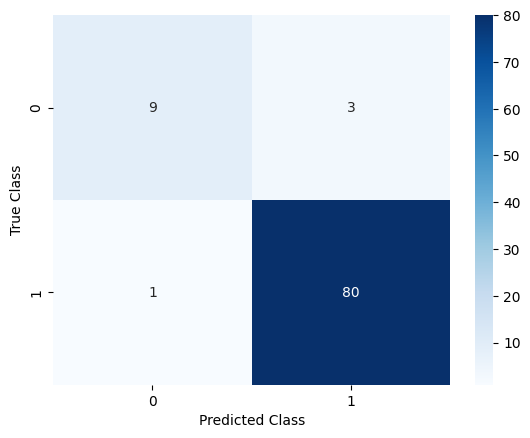

In [43]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

                    # Predicted Class
              #---------------------------       
              #  |    Positive   |  Negative   |
            #----------------------------------------------
 # Positive (P)   |  True Positive | False Negative |
 #  ----------------------------------------------
 # Negative (N)   |  False Positive| True Negative  |
 #   ----------------------------------------------
